 DataFramee:
      user_id  touch_type  touch  finger  palm  fist  251  649  849  851  ...  \
0           0           0      0       0     0     0  -56    2   -6  -22  ...   
1           0           0      0       0     0     0  -29   -7  -11  -14  ...   
2           0           0      0       0     0     0  -34  -16  -19  -43  ...   
3           0           0      0       0     0     0  -24   -1   -5  -38  ...   
4           0           0      0       0     0     0  -24  -10  -10  -26  ...   
...       ...         ...    ...     ...   ...   ...  ...  ...  ...  ...  ...   
2051       29           9      1       0     1     0  -20  -64  -45  -48  ...   
2052       29           9      1       0     1     0  -71  -55  -75  -53  ...   
2053       29           9      1       0     1     0  -66  -70  -39  -85  ...   
2054       29           9      1       0     1     0  -67  -53  -60  -54  ...   
2055       29           0      0       0     0     0    2  -20    9   -9  ...   

      2662  26

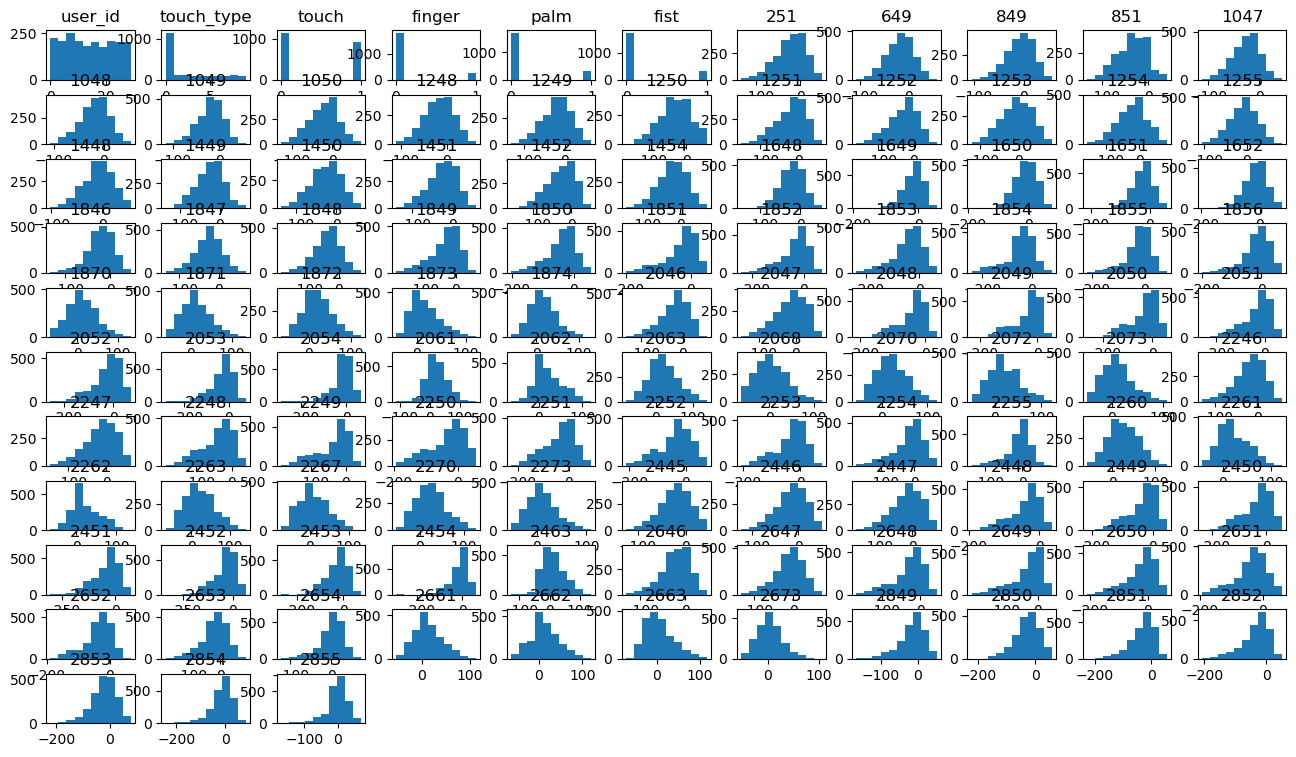

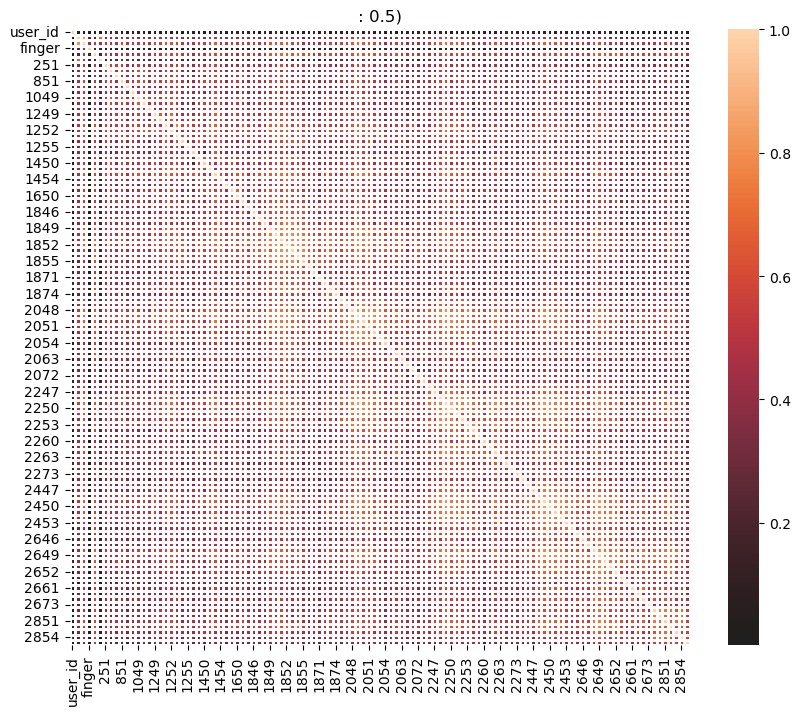

<Figure size 500x500 with 0 Axes>

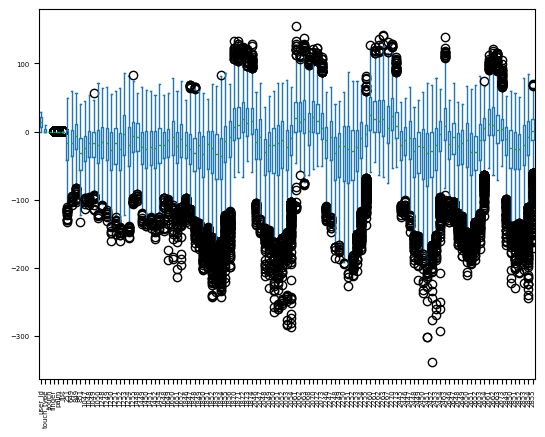

In [1]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------
# 24.04.2024 - HÃ¼seyin Sezerol
#---------------------------------------------------------------------------------------------------------------------------------------------------------
# Libs
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.exceptions import ConvergenceWarning


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import VotingClassifier

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


import time
#---------------------------------------------------------------------------------------------------------------------------------------------------------
df = pd.read_excel(r"common_dataset_touch_features_offset.xlsx")
df['touch'] = df['touch'].astype(int)
df['finger'] = df['finger'].astype(int)
df['palm'] = df['palm'].astype(int)
df['fist'] = df['fist'].astype(int)


warnings.filterwarnings("ignore")
#---------------------------------------------------------------------------------------------------------------------------------------------------------

correlation_matrix = df.corr()

correlation_with_target1 = correlation_matrix['user_id'].abs().sort_values(ascending=False)
correlation_with_target2 = correlation_matrix['touch_type'].abs().sort_values(ascending=False)
correlation_with_target3 = correlation_matrix['touch'].abs().sort_values(ascending=False)
correlation_with_target4 = correlation_matrix['finger'].abs().sort_values(ascending=False)
correlation_with_target5 = correlation_matrix['palm'].abs().sort_values(ascending=False)
correlation_with_target6 = correlation_matrix['fist'].abs().sort_values(ascending=False)

threshold = 0.5

columns_to_drop_target1 = correlation_with_target1[correlation_with_target1 < threshold].index
columns_to_drop_target2 = correlation_with_target2[correlation_with_target2 < threshold].index
columns_to_drop_target3 = correlation_with_target3[correlation_with_target3 < threshold].index
columns_to_drop_target4 = correlation_with_target4[correlation_with_target4 < threshold].index
columns_to_drop_target5 = correlation_with_target5[correlation_with_target5 < threshold].index
columns_to_drop_target6 = correlation_with_target6[correlation_with_target6 < threshold].index

intersection = set(columns_to_drop_target1).intersection(columns_to_drop_target2)
intersection = set(intersection).intersection(columns_to_drop_target3)
intersection = set(intersection).intersection(columns_to_drop_target4)
intersection = set(intersection).intersection(columns_to_drop_target5)
intersection = set(intersection).intersection(columns_to_drop_target6)

df_filtered = df.drop(columns=intersection)
print(" DataFramee:")
print(df_filtered)
df_filtered.to_csv("14_TouchFeatures_Dataset.csv", index=False)
#---------------------------------------------------------------------------------------------------------------------------------------------------------

df_filtered.hist(bins=10,figsize=(16,9),grid=False)
plt.figure(figsize=(10, 8))
corr2=np.abs(df_filtered.corr(method='pearson'))
sns.heatmap(corr2, annot=False, fmt=".2f", linewidths=0.9, center=0)
plt.title(f": {threshold})")

plt.figure(figsize=(5, 5))
ax = df_filtered.plot(kind='box', subplots=False, fontsize=5)
ax.set_xticklabels(df_filtered.columns, rotation=90)
#---------------------------------------------------------------------------------------------------------------------------------------------------------
# Build Best Classification Model
#datas=pd.read_csv('14_TouchFeatures_Dataset.csv')
inputs = df_filtered.iloc[:,6:]
output_columns = ["user_id","touch_type","touch","finger","palm","fist"]

#classification------------------------------------------------------------------------

for index in range(0,6):
    output = df_filtered.iloc[:,index]
    filename=output_columns[index]
    print(filename)
    
    # Separate data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2,train_size=0.8, random_state=47,shuffle=True)

    #Loading the models to be tried------------------------------------------------------------------------------
    models = []
    
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ExtraT', ExtraTreesClassifier()))
    models.append(('RndFor', RandomForestClassifier()))
    
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('MLP',MLPClassifier()))
    models.append(('GaussNB',GaussianNB()))
    
    models.append(('AdaBoost',AdaBoostClassifier()))
   # models.append(('GRBoost',GradientBoostingClassifier()))
    
    #models.append(('GaussPC',GaussianProcessClassifier()))
    
    models.append(('LogisR', LogisticRegression()))
    
    models.append(('sgd',SGDClassifier()))
    
    
   # models.append(( 'histgb',HistGradientBoostingClassifier()))

    #SVR
   # models.append(('SVC-Linear', SVC(kernel="linear")))
   # models.append(('SVC-RBF', SVC(kernel='rbf')))
    models.append(('SVC-Sigmoid', SVC(kernel="sigmoid")))
   # models.append(('SVC-Poly2', SVC(kernel="poly",degree=2)))
   # models.append(('SVC-Poly3', SVC(kernel="poly",degree=3)))
    
    #ANN
    #models.append(('ANN-lbfgs',MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    models.append(('ANN-sgd',MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    #models.append(('ANN-adam',MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    
    #Boosting
    #models.append(('xgb',xgb.XGBRegressor(verbosity=0,learning_rate = 0.01,max_depth= 5,n_estimators= 300,subsample= 0.8)))
    #models.append(('lgb',lgb.LGBMRegressor(verbose=-1)))
    #models.append(('catb',CatBoostRegressor(verbose=False)))
    
    #Testing models------------------------------------------------------------------------------
    num_folds = 10
    results = {}

    start_time0 = time.time()
    for name, model in models:
        start_time = time.time()
        
        skfold = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=47)
        cv_results = cross_val_score(model, x_train, y_train, cv=skfold, scoring="accuracy",error_score='raise')
        
        mean_accuracy = cv_results.mean()
        
        model.fit(x_train, y_train)
        test_accuracy = model.score(x_test, y_test)
        results[name] = test_accuracy
        
        
        print(f"{name} CV - acc :  {mean_accuracy:.16f}")
        print(f"{name} test-acc :  {test_accuracy:.16f}")
        
       
        end_time = time.time();elapsed_time = end_time - start_time;print(f"{name.ljust(8)}: {elapsed_time} sec\n")
        
    end_time0 = time.time();elapsed_time = end_time0 - start_time0;print(f"All models:{elapsed_time} sec")
        

    print("\n")
    print(filename)
    best_model = max(results, key=results.get)
    print("best dependOnTest: ", best_model)


    models_dict = dict(models)
    # Train the best model
    best_model_instance = models_dict.get(best_model)
    best_model_instance.fit(x_train, y_train)

    # Evaluate the performance of the best model on the test set
    test_accuracy = best_model_instance.score(x_test, y_test)
    print("Test set test-acc (best model):", test_accuracy)

    # Calculate evaluation metrics for the best model
    y_pred = best_model_instance.predict(x_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Print the evaluation metrics for the best model
    print("\nEvaluation metric scores for best model which is {}:".format(best_model))
    print("Test set accuracy:", test_accuracy)
    print("Test set precision:", precision)
    print("Test set recall:", recall)
    print("Test set F1 score:", f1)
 
   

    
    best_model = max(results, key=results.get)
    print("Best model:", best_model)

   
    best_model_instance = models_dict.get(best_model)

   
    with open(f'{filename}best_model.pkl', 'wb') as f:
        pickle.dump(best_model_instance, f)

    print("\n")
